<center>
<h1> Ujian Akhir Semester
<h3> PREDIKSI TEMPERATUR MOTOR LISTRIK SEBAGAI MASUKAN UNTUK SISTEM PENDINGIN PADA MOTOR LISTRIK DENGAN METODE K-NEIGHBOURS REGRESSOR
</center>

<center>
Oleh:
</center>

<center>
Rizqi Dian Anggara (22/496470/TK/54398)

Sumber Dataset: https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature

Catatan: Program ini merupakan pengembangan dari tugas - tugas sebelumnya seperti tugas proyek akhir kecerdasan 

# A. Data Understanding

<h1> 1. Import Library

In [1]:
# Import library
# 1. Pengolah Data dan File
import pandas as pd
import numpy as np
import zipfile
import gdown #Library untuk mendownload file dari drive (ini kalau menggunakan collab bisa alternatif tanpa harus upload berulang)

# 2. Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Modelling, Preparation, Evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

<h1> 2. Load Dataset

In [2]:
# Ini tadi code kalau digunakan pada collab
# import gdown

# # ID file Google Drive
# file_id = '1zb8TLfcU_kznvO9bMlA-qvec1bqlplTB'
# # Format URL yang sesuai untuk gdown
# url = f'https://drive.google.com/uc?id={file_id}'
# gdown.download(url, 'electrical_motor.zip', quiet=False)

In [3]:
# Dimulai dengan load dataset dan extract
with zipfile.ZipFile('electrical_motor.zip', 'r') as zip_ref:
    zip_ref.extractall('motor')

In [4]:
# Load dataset dengan path yang ada
file_path = 'motor/measures_v2.csv'
data = pd.read_csv(file_path)
print(data.head())  # Menampilkan 5 baris pertama

        u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  profile_id  
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101          17  
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417          17  
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615          17  
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303          17  
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197          17  


# 3. Deskripsi Statistik Data

In [5]:
# Informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [6]:
# Informasi Statistik
data.describe()

u_q       coolant  stator_winding           u_d  stator_tooth  \
count  1.330816e+06  1.330816e+06    1.330816e+06  1.330816e+06  1.330816e+06   
mean   5.427900e+01  3.622999e+01    6.634275e+01 -2.513381e+01  5.687858e+01   
std    4.417323e+01  2.178615e+01    2.867206e+01  6.309197e+01  2.295223e+01   
min   -2.529093e+01  1.062375e+01    1.858582e+01 -1.315304e+02  1.813398e+01   
25%    1.206992e+01  1.869814e+01    4.278796e+01 -7.869090e+01  3.841601e+01   
50%    4.893818e+01  2.690014e+01    6.511013e+01 -7.429755e+00  5.603635e+01   
75%    9.003439e+01  4.985749e+01    8.814114e+01  1.470271e+00  7.558668e+01   
max    1.330370e+02  1.015985e+02    1.413629e+02  1.314698e+02  1.119464e+02   

        motor_speed           i_d           i_q            pm   stator_yoke  \
count  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06   
mean   2.202081e+03 -6.871681e+01  3.741278e+01  5.850678e+01  4.818796e+01   
std    1.859663e+03  6.493323e+01  9.218188e+01  1.900150e+01  1.999100e+01   
min   -2.755491e+02 -2.780036e+02 -2.934268e+02  2.085696e+01  1.807669e+01   
25%    3.171107e+02 -1.154061e+02  1.095863e+00  4.315158e+01  3.199033e+01   
50%    1.999977e+03 -5.109376e+01  1.577401e+01  6.026629e+01  4.562551e+01   
75%    3.760639e+03 -2.979688e+00  1.006121e+02  7.200837e+01  6.146083e+01   
max    6.000015e+03  5.189670e-02  3.017079e+02  1.136066e+02  1.011480e+02   

            ambient        torque    profile_id  
count  1.330816e+06  1.330816e+06  1.330816e+06  
mean   2.456526e+01  3.110603e+01  4.079306e+01  
std    1.929522e+00  7.713575e+01  2.504549e+01  
min    8.783478e+00 -2.464667e+02  2.000000e+00  
25%    2.318480e+01 -1.374265e-01  1.700000e+01  
50%    2.479733e+01  1.086035e+01  4.300000e+01  
75%    2.621702e+01  9.159718e+01  6.500000e+01  
max    3.071420e+01  2.610057e+02  8.100000e+01

# B. Data Preparation

# 1. Periksa NaN, Duplicated, dan Null Value

In [9]:
# 1. Menghitung Nilai NaN, Duplicated, dan Null
null = data.isnull().sum()
dup = data.duplicated().sum()
NaN = data.isna().sum()

# 2. Memeriksa Nilai dalam dataframe agar mudah memeriksa 
prep = pd.DataFrame(
    {
        "null": null,
        "duplicated": dup,
        "NaN Values": NaN,
    }
)
prep

null  duplicated  NaN Values
u_q                0           0           0
coolant            0           0           0
stator_winding     0           0           0
u_d                0           0           0
stator_tooth       0           0           0
motor_speed        0           0           0
i_d                0           0           0
i_q                0           0           0
pm                 0           0           0
stator_yoke        0           0           0
ambient            0           0           0
torque             0           0           0
profile_id         0           0           0

In [10]:
# Memeriksa nilai 0
for column in data.columns:
  num_zero = (data[column] == 0).sum()
  if num_zero != 0:
    print(f'{column} :  {num_zero} memiliki nilai nol')
  else:
    print(f'{column} :  Sebanyak: {num_zero} dan tidak memiliki nilai nol')

u_q :  Sebanyak: 0 dan tidak memiliki nilai nol
coolant :  Sebanyak: 0 dan tidak memiliki nilai nol
stator_winding :  Sebanyak: 0 dan tidak memiliki nilai nol
u_d :  Sebanyak: 0 dan tidak memiliki nilai nol
stator_tooth :  Sebanyak: 0 dan tidak memiliki nilai nol
motor_speed :  Sebanyak: 0 dan tidak memiliki nilai nol
i_d :  Sebanyak: 0 dan tidak memiliki nilai nol
i_q :  Sebanyak: 0 dan tidak memiliki nilai nol
pm :  Sebanyak: 0 dan tidak memiliki nilai nol
stator_yoke :  Sebanyak: 0 dan tidak memiliki nilai nol
ambient :  Sebanyak: 0 dan tidak memiliki nilai nol
torque :  Sebanyak: 0 dan tidak memiliki nilai nol
profile_id :  Sebanyak: 0 dan tidak memiliki nilai nol


# 2. Matriks Korelasi

Text(0.5, 1.0, 'Correlation Matrix Masing-Masing Fitur ')

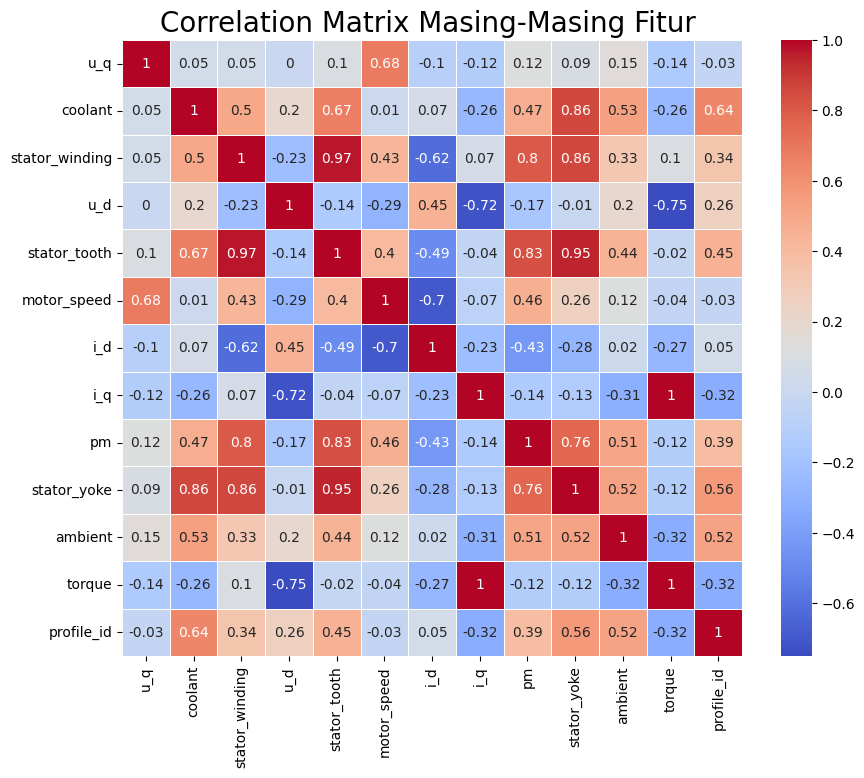

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix Masing-Masing Fitur ", size=20)

# 3. Remove Outlier

c:\Users\Rizqi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rizqi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rizqi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rizqi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

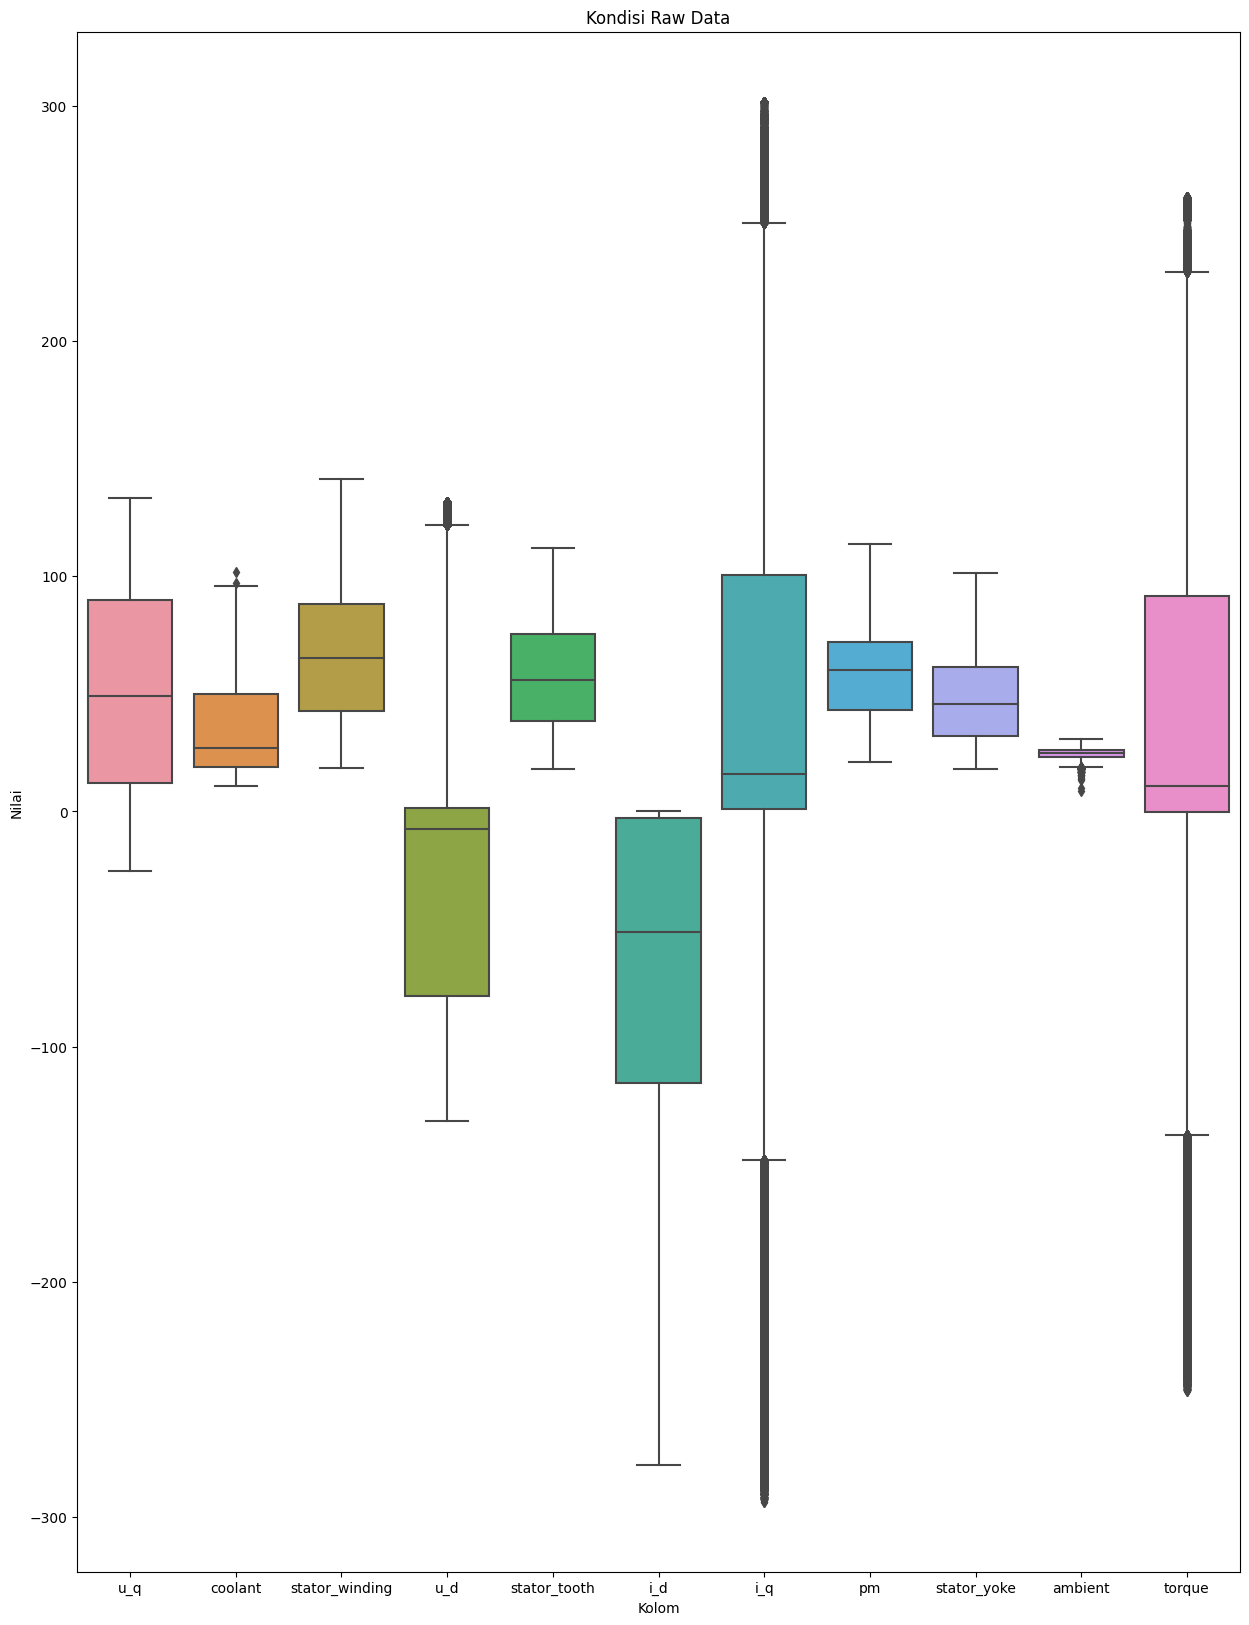

In [13]:
# Memeriksa Oulier
outlier = data.select_dtypes(include='number').drop(columns=['motor_speed', 'profile_id'], errors='ignore')

# Set ukuran grafik
plt.figure(figsize=(15, 20))

# Plot boxplot untuk kolom yang dipilih
sns.boxplot(data=outlier)

# Menambahkan judul dan label
plt.title("Kondisi Raw Data")
plt.xlabel("Kolom")
plt.ylabel("Nilai")

# Tampilkan plot
plt.show()


In [14]:
# Menghapus Outlier
numeric_columns = data.select_dtypes(include='number').columns

# Fungsi untuk mengatasi outlier dengan IQR
def remove_outliers(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter outlier
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    return data

# Menghapus outlier dari dataframe
data_clean = remove_outliers(data, numeric_columns)

# Menampilkan dataframe yang telah dibersihkan dari outlier
data_clean.head()


u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  profile_id  
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101          17  
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417          17  
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615          17  
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303          17  
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197          17

In [15]:
# Memeriksa data apakah sudah dihilangkan outliernya
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262850 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1262850 non-null  float64
 1   coolant         1262850 non-null  float64
 2   stator_winding  1262850 non-null  float64
 3   u_d             1262850 non-null  float64
 4   stator_tooth    1262850 non-null  float64
 5   motor_speed     1262850 non-null  float64
 6   i_d             1262850 non-null  float64
 7   i_q             1262850 non-null  float64
 8   pm              1262850 non-null  float64
 9   stator_yoke     1262850 non-null  float64
 10  ambient         1262850 non-null  float64
 11  torque          1262850 non-null  float64
 12  profile_id      1262850 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 134.9 MB


c:\Users\Rizqi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rizqi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rizqi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rizqi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

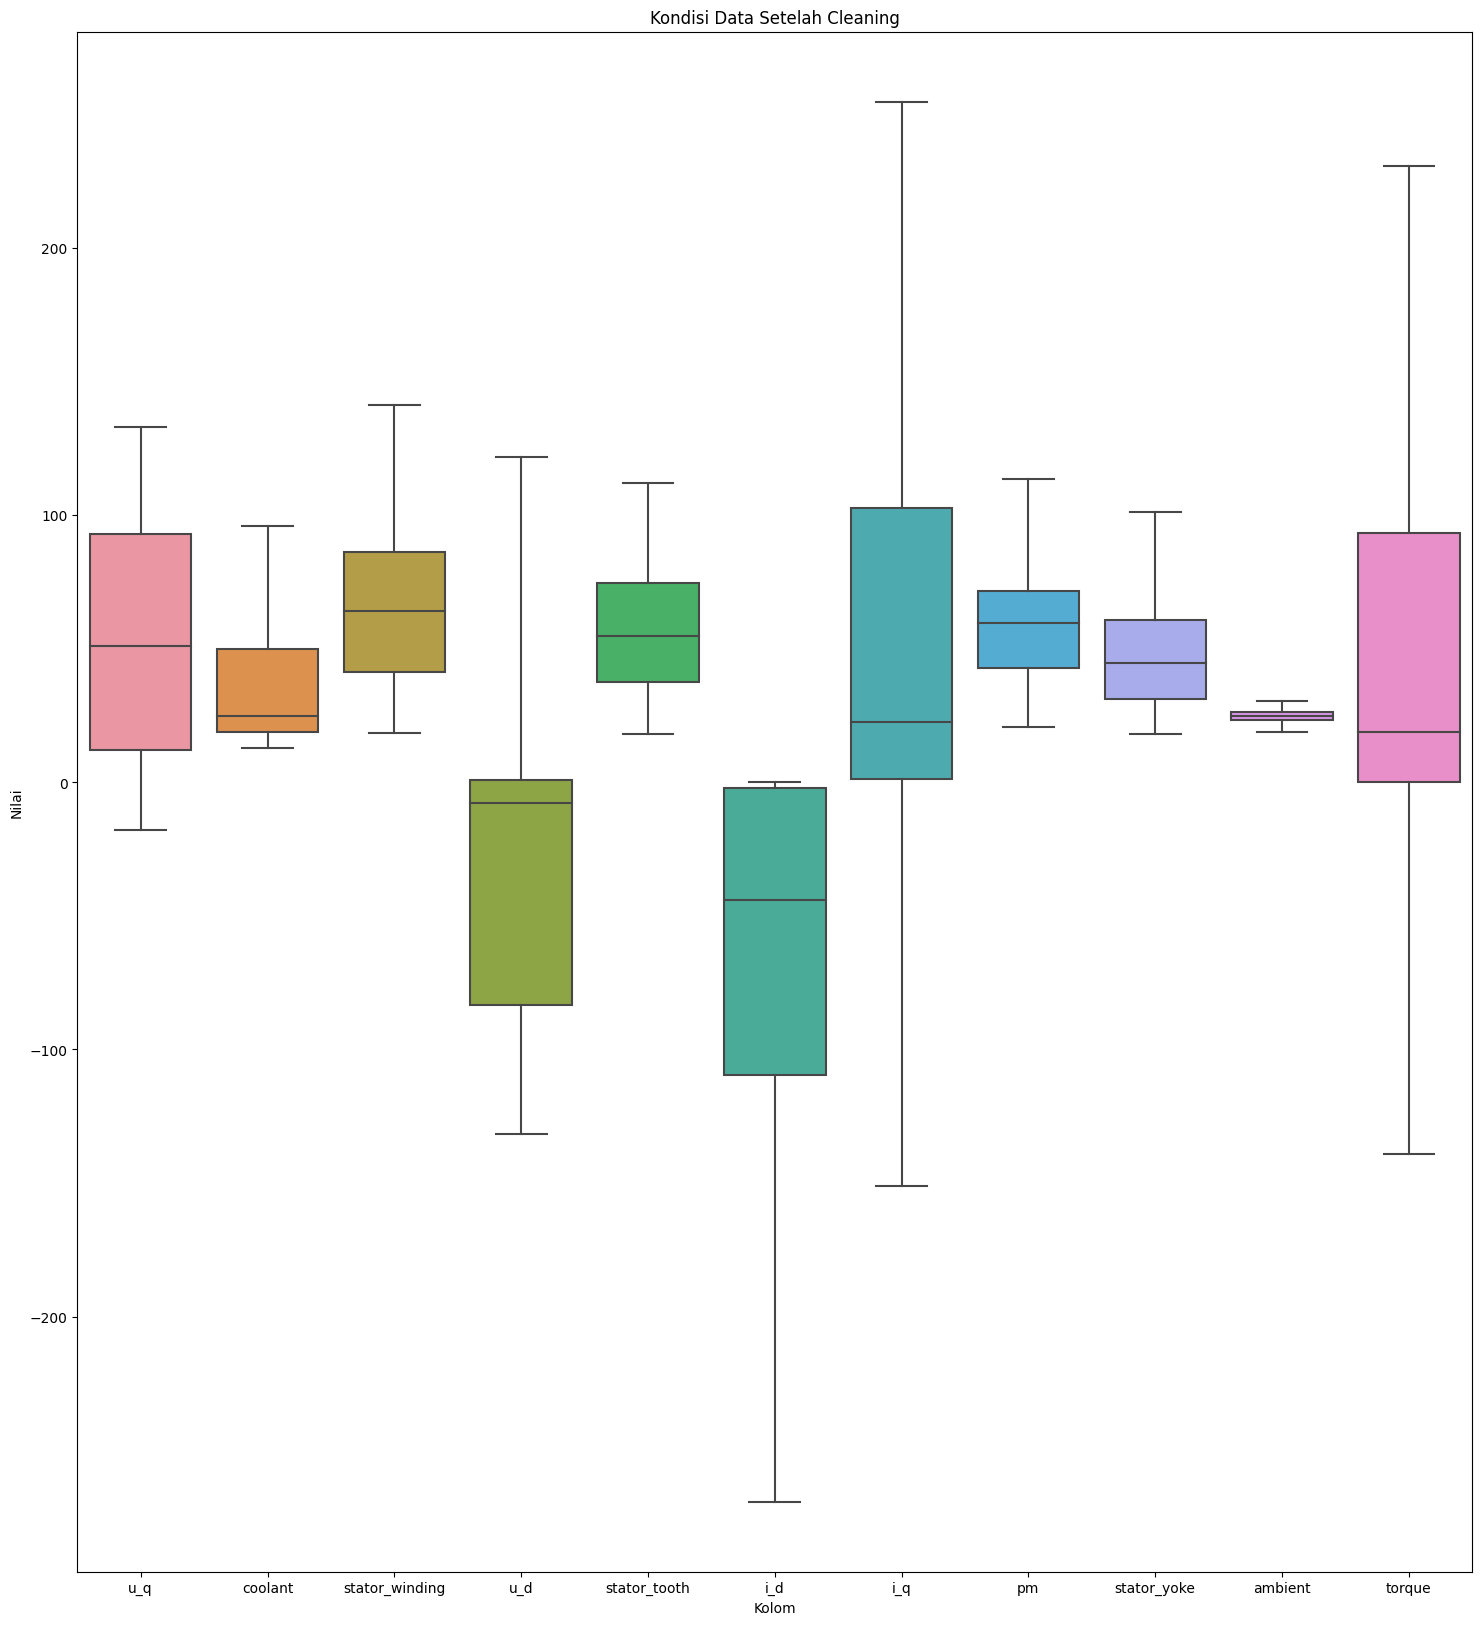

In [16]:
# Visualisasi data tanpa outlier
outlier_new = data_clean.select_dtypes(include='number').drop(columns=['motor_speed', 'profile_id'], errors='ignore') # Pilih 13 kolom numerik pertama

# Set ukuran grafik
plt.figure(figsize=(18, 20))

# Plot boxplot untuk 13 kolom
sns.boxplot(data=outlier_new)

# Menambahkan judul dan label
plt.title("Kondisi Data Setelah Cleaning")
plt.xlabel("Kolom")
plt.ylabel("Nilai")

# Tampilkan plot
plt.show()


# 4. Eksplorasi Variabel

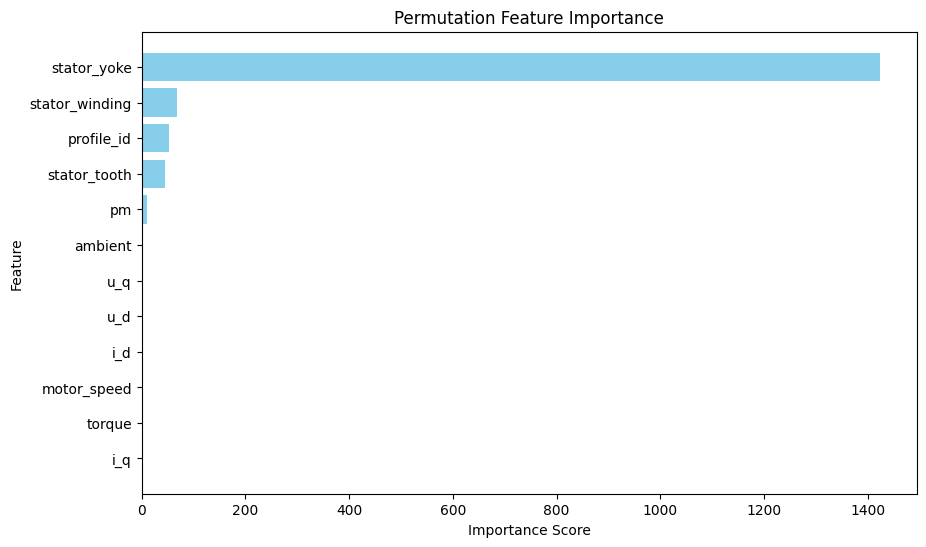

In [ ]:
# Feature Importance

# 1. Menggunakan HIstgradientboosting
X = data_clean.drop(columns=['coolant'])  # 'coolant' diasumsikan sebagai target
y = data_clean['coolant']

model = HistGradientBoostingRegressor(random_state=42)
model.fit(X,y)

# 2. Seleksi Fitur dengan permutasi
perm_importance = permutation_importance(model, X, y, scoring='neg_mean_squared_error', random_state=42)

# Membuat DataFrame
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot Fitur
plt.figure(figsize=(10, 6))
plt.barh(perm_df['Feature'], perm_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()


# C. Data Modelling

# 1. Split Dataset

In [18]:
x = data_clean[['stator_yoke','stator_winding']]
y = data_clean['coolant']                           # variabel Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

print(f'train_size = {len(x_train)}')
print(f'test_size = {len(x_test)}')

train_size = 1199707
test_size = 63143


# 2. Modelling

In [19]:
models = pd.DataFrame(index = ['train_mse','test_mse'],
                      columns = ['KNN','HGB'])

In [20]:
# Model pertama
KNN = KNeighborsRegressor(n_neighbors=35,metric="manhattan")
KNN.fit(x_train,y_train)
models.loc['train_mse','KNN'] = mean_squared_error(y_pred=KNN.predict(x_train), y_true = y_train)


In [ ]:
# Model Kedua
HGB = HistGradientBoostingRegressor(random_state=32)
HGB.fit(x_train,y_train)
models.loc['train_mse','HGB'] = mean_squared_error(y_pred=HGB.predict(x_train), y_true = y_train)


# D. EVALUATION

# 1. Penentuan Parameter Evaluasi

In [22]:
# Buat DataFrame untuk menampung MSE, MAE, dan R2
metrics = pd.DataFrame(columns=['train_mse', 'test_mse', 'train_mae', 'test_mae', 'train_r2', 'test_r2'], 
                       index=['KNN', 'HGB'])

# Dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': KNN, 'HGB': HGB}

# Hitung evaluasi untuk masing-masing algoritma
for name, model in model_dict.items():
    # Prediksi pada data train dan test
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # Simpan metrik untuk data train
    metrics.loc[name, 'train_mse'] = mean_squared_error(y_true=y_train, y_pred=train_pred)
    metrics.loc[name, 'train_mae'] = mean_absolute_error(y_true=y_train, y_pred=train_pred)
    metrics.loc[name, 'train_r2'] = r2_score(y_true=y_train, y_pred=train_pred)

    # Simpan metrik untuk data test
    metrics.loc[name, 'test_mse'] = mean_squared_error(y_true=y_test, y_pred=test_pred)
    metrics.loc[name, 'test_mae'] = mean_absolute_error(y_true=y_test, y_pred=test_pred)
    metrics.loc[name, 'test_r2'] = r2_score(y_true=y_test, y_pred=test_pred)

# Panggil metrics
metrics


train_mse   test_mse train_mae  test_mae  train_r2   test_r2
KNN  10.916977  11.810447  1.604656  1.665233  0.977054  0.975228
HGB  13.493161  13.746464  1.952323  1.962391  0.971639  0.971167

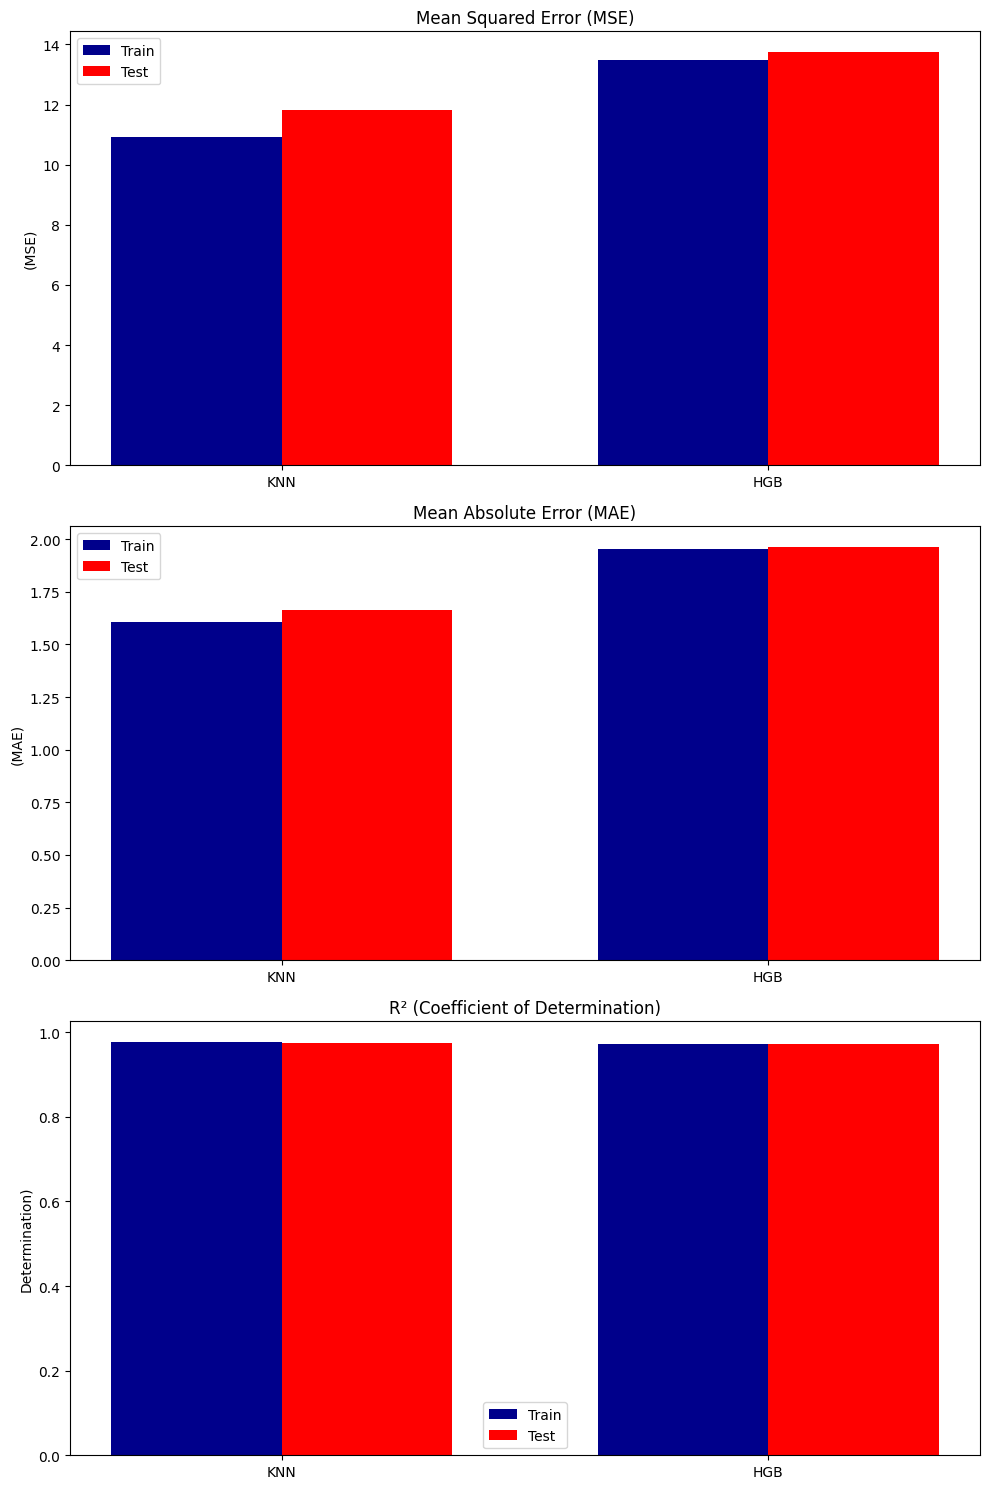

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # 3 barplot secara vertikal
metrics_names = [('train_mse', 'test_mse', 'Mean Squared Error (MSE)'),
                 ('train_mae', 'test_mae', 'Mean Absolute Error (MAE)'),
                 ('train_r2', 'test_r2', 'R² (Coefficient of Determination)')]

# Iterasi setiap metrik dan plot
for idx, (train_col, test_col, title) in enumerate(metrics_names):
    ax = axes[idx]
    x = np.arange(len(metrics))  # Indeks algoritma
    width = 0.35  # Lebar bar

    # Plot bar untuk train dan test
    ax.bar(x - width/2, metrics[train_col], width, label='Train', color='darkblue')
    ax.bar(x + width/2, metrics[test_col], width, label='Test', color='red')

    # Set judul, label, dan xticks
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics.index)
    ax.set_ylabel(title.split(' ')[-1])  # Ambil nama metrik (MSE, MAE, R²)
    ax.legend()

# Atur layout dan tampilkan plot
plt.tight_layout()
plt.show()

# E. PREDICTION

# 1. Prediksi Data

In [26]:
prediksi = x_test.iloc[:12].copy()
pred_dict = {'y_true':y_test[:12]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi)

pd.DataFrame(pred_dict)

y_true  prediksi_KNN  prediksi_HGB
256974   18.555853     18.979049     19.259764
518145   18.461946     18.341341     18.897985
118693   18.217604     18.574469     19.971802
296151   64.660179     64.476924     64.885942
1098774  91.083665     91.086728     89.865759
1279306  79.565803     80.844635     81.245484
1028595  39.651763     39.348048     41.113787
650118   54.997553     55.196587     53.274732
957480   70.519145     70.339201     71.593506
655017   68.218147     63.984870     64.363136
103441   18.136776     18.384718     18.562150
296779   65.061508     65.228128     64.885942

# 2. Komparisi dengan Ideal

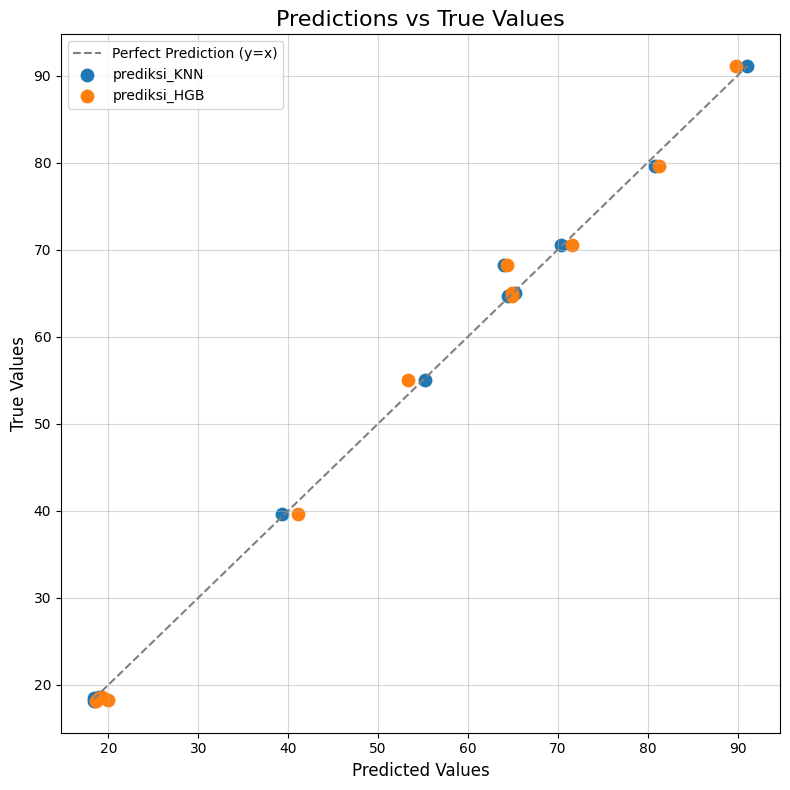

In [27]:
pred_df = pd.DataFrame(pred_dict)

# Plot scatter untuk setiap model
plt.figure(figsize=(8, 8))

# Plot garis kesempurnaan prediksi (y=x)
x_values = np.linspace(pred_df.iloc[:, 1:].values.min(), pred_df.iloc[:, 1:].values.max(), 100)
plt.plot(x_values, x_values, color='gray', linestyle='--', label='Perfect Prediction (y=x)')

# Scatter plot untuk setiap model
for col in pred_df.columns[1:]:  # Mulai dari prediksi_<model>
    plt.scatter(pred_df[col], pred_df['y_true'], label=col, s=80)  # Titik prediksi vs y_true

# Kustomisasi plot
plt.title('Predictions vs True Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()